<center><h1>Liu_Zihan_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
import math
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Get the Vertebral Column Data Set

In [2]:
data, meta = arff.loadarff('../data/column_2C_weka.arff')

# Convert into DataFrame
df_vertebral = pd.DataFrame(data)
print(df_vertebral)


     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis        class  
0        98.672917                 -0.2

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

In [3]:
# Convert string class into dummies
C_CLASS = 'class'
C_DUMMY_CLASS = 'dummy_class'

df_vertebral[C_DUMMY_CLASS] = df_vertebral[C_CLASS].map({b'Normal': 0, b'Abnormal': 1})

In [4]:
print(df_vertebral)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis        class  dummy_class  
0        98.672917        

/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

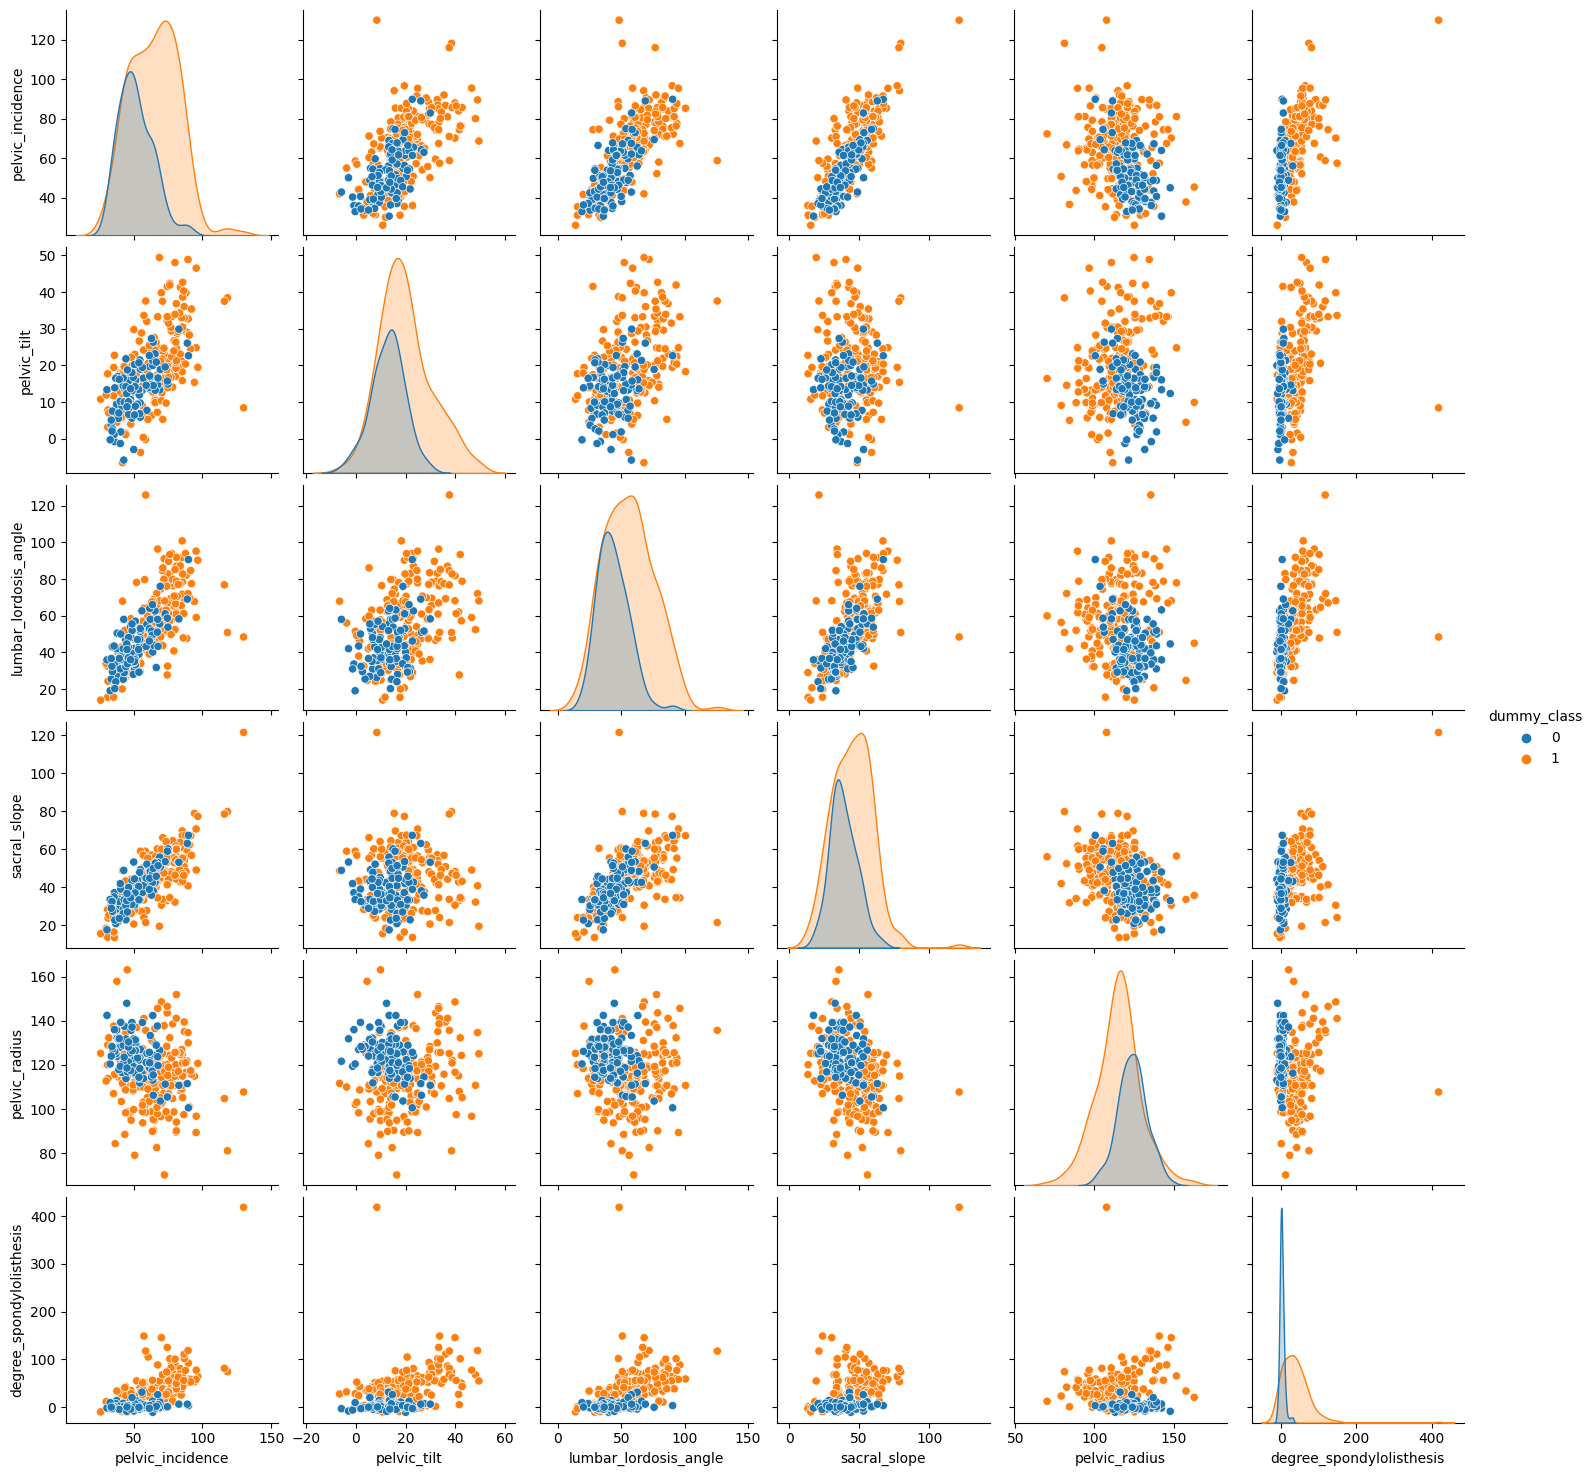

In [5]:
# Make scatterplots of the independent variables in the dataset.
# Use color to show Classes 0 and 1.

sns.pairplot(df_vertebral, hue=C_DUMMY_CLASS)
plt.show()

According to the scatter plots above, feature **'degree_spondylolisthesis'** can mostly classify data points into 2 classes.

It is shown that the **overlapping** of blue data points and orange data points **is minimum** for feature 'degree_spondylolisthesis', which indicates that this feature is helpful for accurate classification.

#### ii. Boxplots

/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liuzihan/env311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

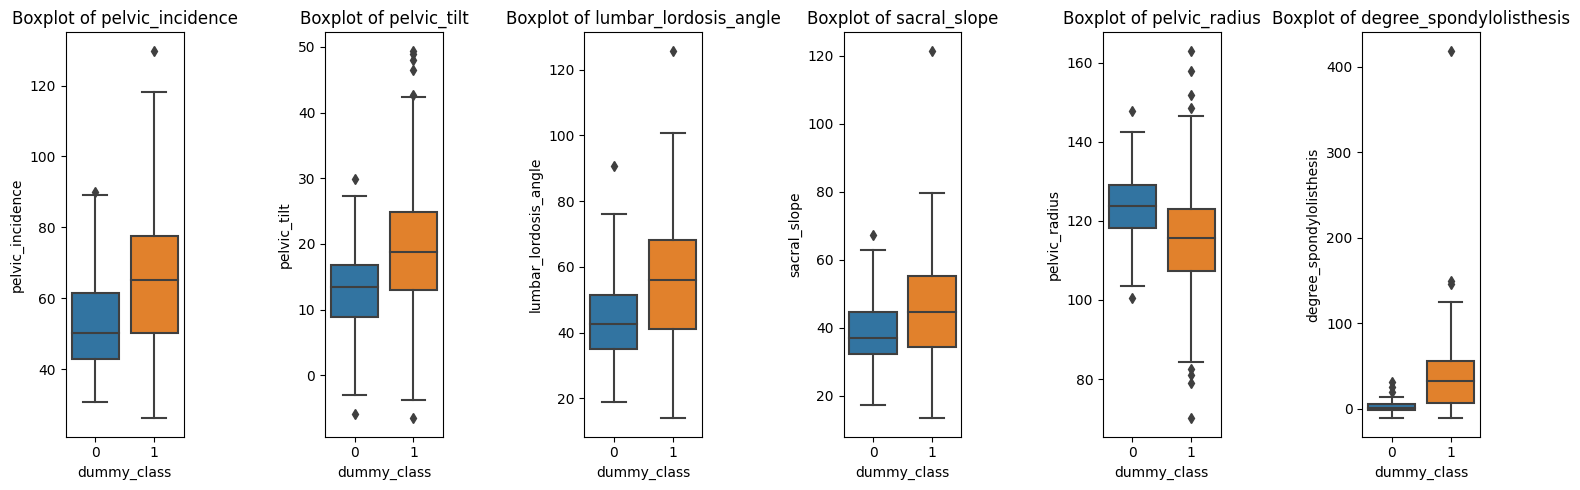

In [6]:
V_FEATURE_NUMBER = 6

fig, axes = plt.subplots(nrows=1, ncols=V_FEATURE_NUMBER, figsize=(15, 5))

for i in range(V_FEATURE_NUMBER):
    sns.boxplot(x=df_vertebral[C_DUMMY_CLASS], y=df_vertebral.iloc[:, i], ax=axes[i])
    axes[i].set_title(f'Boxplot of {df_vertebral.columns[i]}')
    axes[i].set_xlabel(C_DUMMY_CLASS)
    
    axes[i].set_ylabel(df_vertebral.columns[i])

plt.tight_layout()
plt.subplots_adjust(wspace=1.2)  # Adjust spacing between subplots
plt.show()

Accoriding to the boxplots above, there are more "outliers" in the distribution of feature 'pelvic_tilt' and 'pelvic_radius' for abnormal data points and more "outliers" in the distribution of feature 'degree_spondylolisthesis'. (These data points are out of the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR])

Ref: https://seaborn.pydata.org/generated/seaborn.boxplot.html

#### iii. Split Data Set

In [7]:
df_train = pd.concat([df_vertebral[df_vertebral[C_DUMMY_CLASS] == 0].iloc[0:70,],\
                       df_vertebral[df_vertebral[C_DUMMY_CLASS] == 1].iloc[0:140,]]).reset_index(drop=True)

df_train = df_train.drop(columns=C_CLASS)

df_test = pd.concat([df_vertebral[df_vertebral[C_DUMMY_CLASS] == 0].iloc[70:,],\
                       df_vertebral[df_vertebral[C_DUMMY_CLASS] == 1].iloc[140:,]]).reset_index(drop=True)

df_test = df_test.drop(columns=C_CLASS)

### (c) Classification

#### i. Euclidean Metric

Use sklearn.neighbors.KNeighborsClassifier() to classify.

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [8]:
def _cal_error_rate(y_actual: pd.DataFrame, y_pred: np.ndarray,) -> float:
    """
    Calculate error rate of classification results.
    Args:
        predict: prediction results
        actual: actual class of data points
    
    Return: error_rate
    """
    num_true = 0
    num_false = 0
    for i in range(y_actual.shape[0]):
        if y_pred[i] == y_actual[i]:
            num_true += 1
        else:
            num_false += 1
    return round(num_false / (num_true + num_false), 2)
    

def knn_classifier(train_data: pd.DataFrame,
                   class_column: str,
                   test_data: pd.DataFrame,
                   n_neighbors: int,
                   weights: str = 'uniform',
                   distance_metric: str = 'euclidean',
                   p: int = 2,
                   metric_params: dict = None):
    """
    This function is used to classify data points with KNN classifier.
    Args:
        train_data: data of training set
        class_column: column name of class (dependent variable)
        test_data: data of test set
        n_neighbors: number of neighbors, which is 'K'
        weights: weights of each neighbors in prediction 
            ('uniform': all points are weighted equally, 
             'distance': weight points by the inverse of their distances so that closer points are weighted more, vice versa)
        distance_metric: the type of distance applied in KNN classification (default='euclidean')
        p: Power parameter for the Minkowski metric (default=2, euclidean_distance)
        metric_parameter: additional keyword arguments for metric function
    
    Returns: train_error_rate, test_error_rate
    """
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=distance_metric, p=p, metric_params=metric_params)
    neigh.fit(train_data.drop(columns=class_column).values, train_data[class_column].values)

    pred_train_data = neigh.predict(train_data.drop(columns=class_column).values)
    pred_test_data = neigh.predict(test_data.drop(columns=class_column).values)

    
    return pred_train_data, pred_test_data

#### ii. Test Data

In [9]:
V_K_START_VALUE = 1 # set start value of K as 1
V_K_END_VALUE = df_train.shape[0] # set end value of K as size of training set
V_K_INCRE = 3 # set increment of K as 3

Euclidean_error_rate = {}

for k in range(V_K_START_VALUE, V_K_END_VALUE, V_K_INCRE):
    pred_train_data, pred_test_data = knn_classifier(df_train, C_DUMMY_CLASS, df_test, k, distance_metric='euclidean')
    train_error_rate = _cal_error_rate(pred_train_data, df_train[C_DUMMY_CLASS])
    test_error_rate = _cal_error_rate(pred_test_data, df_test[C_DUMMY_CLASS])

    Euclidean_error_rate[k] = [train_error_rate, test_error_rate]

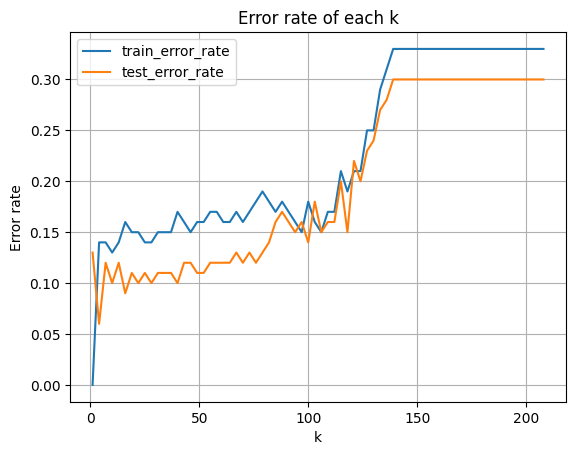

In [10]:
C_TRAIN_ERROR_RATE = 'train_error_rate'
C_TEST_ERROR_RATE = 'test_error_rate'

df_Euclidean_error_rate = pd.DataFrame(Euclidean_error_rate, index=[C_TRAIN_ERROR_RATE, C_TEST_ERROR_RATE]).T

plt.plot(df_Euclidean_error_rate.index, df_Euclidean_error_rate[C_TRAIN_ERROR_RATE], label=C_TRAIN_ERROR_RATE) 
plt.plot(df_Euclidean_error_rate.index, df_Euclidean_error_rate[C_TEST_ERROR_RATE], label=C_TEST_ERROR_RATE)

plt.title("Error rate of each k")
plt.xlabel("k")
plt.ylabel("Error rate")
plt.legend()
plt.grid(True)

plt.show()

Based on the plot showing training error rate and test error rate of each $k$, $k^*=4$ because test error rate and training error rate are both minimum when $k=4$. 

When $k=4$, training error rate = 0.14, test error rate = 0.06

In [11]:
# Find the optimal k with minimum test error rate
print("Optimal k with Euclidean distance:",df_Euclidean_error_rate[C_TEST_ERROR_RATE].idxmin())
print("Minimum test error rate with Euclidean distance:", df_Euclidean_error_rate[C_TEST_ERROR_RATE].min())

Optimal k with Euclidean distance: 4
Minimum test error rate with Euclidean distance: 0.06


##### Try with smaller increments of K

In [12]:
def get_error_rate_per_k(train_data: pd.DataFrame, 
                  class_column: str, 
                  test_data: pd.DataFrame, 
                  k_incre: int,
                  weights: str = 'uniform', 
                  distance_metrics: str = 'euclidean', 
                  p: int = 2,
                  metric_parameter: dict = None) -> pd.DataFrame:
    """
    Get the training error rate and test error rate of each k for a specific training set.
    Args:
        train_data: training set (maybe sampled from all training data points)
        class_column: column name of classes (also dependent variable)
        test_data: test set
        k_incre: increment of k
        weights: weights of each neighbors in prediction 
            ('uniform': all points are weighted equally, 
             'distance': weight points by the inverse of their distances so that closer points are weighted more, vice versa)
        distance_metric: the type of distance applied in KNN classification (default='euclidean')
        p: Power parameter for the Minkowski metric (default=2, euclidean_distance)
        metric_parameter: additional keyword arguments for metric function (defalut=None)
    Returns: df_error_rate
    """
    error_rate = {}

    # range of k is determined by size of training set and increment of k
    for k in range(1, train_data.shape[0], k_incre):
        pred_train_data, pred_test_data = knn_classifier(train_data, class_column, test_data, k,
                                                          weights, distance_metrics, p, metric_parameter)
        error_rate[k] = [_cal_error_rate(train_data[C_DUMMY_CLASS], pred_train_data),
                         _cal_error_rate(test_data[C_DUMMY_CLASS], pred_test_data)]
    
    df_error_rate = pd.DataFrame(error_rate, index=[C_TRAIN_ERROR_RATE, C_TEST_ERROR_RATE]).T
    
    return df_error_rate

k with minimum training error when increment of k = 2: 1
k with minimum test error when increment of k = 2: 3


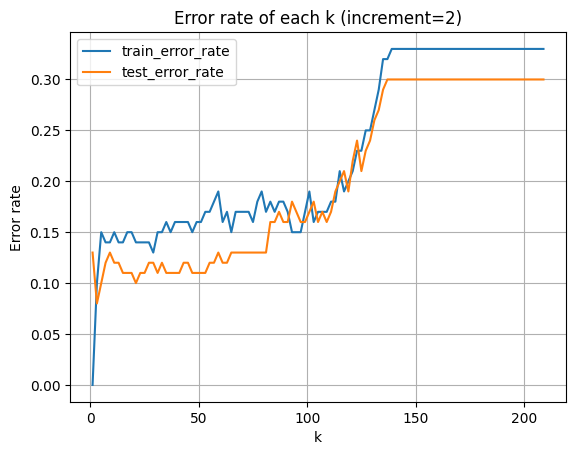

In [13]:
V_K_INCRE = 2 # set increment of k as 2

df_error_rate_k_incre_2 = get_error_rate_per_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE)
print("k with minimum training error when increment of k = 2:", df_error_rate_k_incre_2[C_TRAIN_ERROR_RATE].idxmin())
print("k with minimum test error when increment of k = 2:", df_error_rate_k_incre_2[C_TEST_ERROR_RATE].idxmin())

plt.plot(df_error_rate_k_incre_2.index, df_error_rate_k_incre_2[C_TRAIN_ERROR_RATE], label=C_TRAIN_ERROR_RATE) 
plt.plot(df_error_rate_k_incre_2.index, df_error_rate_k_incre_2[C_TEST_ERROR_RATE], label=C_TEST_ERROR_RATE)

plt.title(f"Error rate of each k (increment={V_K_INCRE})")
plt.xlabel("k")
plt.ylabel("Error rate")
plt.legend()
plt.grid(True)

plt.show()

Thus, when increment of k = 2, the optimal k is set to be 3

In [14]:
optimal_k_incre_2 = df_error_rate_k_incre_2[C_TEST_ERROR_RATE].idxmin()
optimal_test_error_rate_incre_2  = df_error_rate_k_incre_2[C_TEST_ERROR_RATE].min()

print(f"Optimal k with Euclidean distance when increment of k is {V_K_INCRE}:", optimal_k_incre_2)
print(f"Minimum test error rate with Euclidean distance when increment of k is {V_K_INCRE}:", optimal_test_error_rate_incre_2)

Optimal k with Euclidean distance when increment of k is 2: 3
Minimum test error rate with Euclidean distance when increment of k is 2: 0.08


k with minimum training error when increment of k = 2: 1
k with minimum test error when increment of k = 2: 4


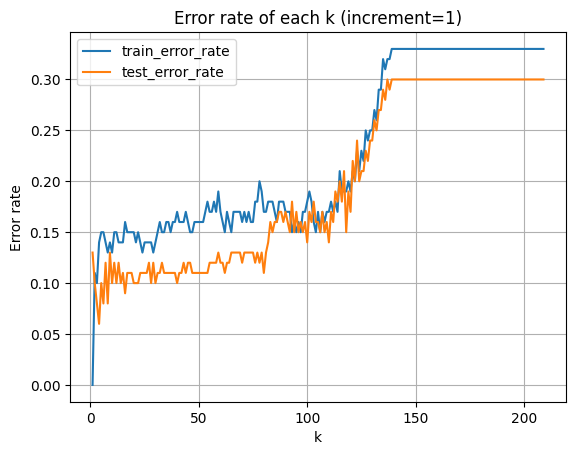

In [15]:
V_K_INCRE = 1 # set increment of k as 2

df_error_rate_k_incre_1 = get_error_rate_per_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE)
print("k with minimum training error when increment of k = 2:", df_error_rate_k_incre_1[C_TRAIN_ERROR_RATE].idxmin())
print("k with minimum test error when increment of k = 2:", df_error_rate_k_incre_1[C_TEST_ERROR_RATE].idxmin())

plt.plot(df_error_rate_k_incre_1.index, df_error_rate_k_incre_1[C_TRAIN_ERROR_RATE], label=C_TRAIN_ERROR_RATE) 
plt.plot(df_error_rate_k_incre_1.index, df_error_rate_k_incre_1[C_TEST_ERROR_RATE], label=C_TEST_ERROR_RATE)

plt.title(f"Error rate of each k (increment={V_K_INCRE})")
plt.xlabel("k")
plt.ylabel("Error rate")
plt.legend()
plt.grid(True)

plt.show()

In [16]:
print(df_error_rate_k_incre_1)

     train_error_rate  test_error_rate
1                0.00             0.13
2                0.11             0.10
3                0.10             0.08
4                0.14             0.06
5                0.15             0.10
..                ...              ...
205              0.33             0.30
206              0.33             0.30
207              0.33             0.30
208              0.33             0.30
209              0.33             0.30

[209 rows x 2 columns]


Thus, when increment of k = 1, the optimal k is set to be 4 with minimum test error rate.

In [17]:
optimal_k_incre_1 = df_error_rate_k_incre_1[C_TEST_ERROR_RATE].idxmin()
optimal_test_error_rate_incre_1 = df_error_rate_k_incre_1[C_TEST_ERROR_RATE].min()

print(f"Optimal k with Euclidean distance when increment of k is {V_K_INCRE}:", optimal_k_incre_1)
print(f"Minimum test error rate with Euclidean distance when increment of k is {V_K_INCRE}:", optimal_test_error_rate_incre_1)

Optimal k with Euclidean distance when increment of k is 1: 4
Minimum test error rate with Euclidean distance when increment of k is 1: 0.06


In total, when increament of $k$ is smaller, $k^*$ is still found out to be 4.

##### Confusion matrix of $k^*$

In [18]:
print(df_error_rate_k_incre_1.to_markdown(index=False))

|   train_error_rate |   test_error_rate |
|-------------------:|------------------:|
|               0    |              0.13 |
|               0.11 |              0.1  |
|               0.1  |              0.08 |
|               0.14 |              0.06 |
|               0.15 |              0.1  |
|               0.15 |              0.08 |
|               0.14 |              0.12 |
|               0.13 |              0.08 |
|               0.14 |              0.13 |
|               0.13 |              0.1  |
|               0.15 |              0.12 |
|               0.15 |              0.1  |
|               0.14 |              0.12 |
|               0.14 |              0.1  |
|               0.14 |              0.11 |
|               0.16 |              0.09 |
|               0.15 |              0.11 |
|               0.15 |              0.11 |
|               0.15 |              0.11 |
|               0.15 |              0.1  |
|               0.14 |              0.1  |
|          

The calculation of confusion matrix refers to sklearn.metrics.confusion_matrix().

The output of sklearn.metrics.confusion_matrix() is:

[[TN, FP],

[FN, TP]]

|    |  Pred_Negative  |   Pred_Positve |
|---:|----------------:|---------------:|
| Actual_Negative | True Negative | False Positive |
| Actual_Positive | False Negative | True Positve  |

The formulas of each metrics are:

true_postive_rate (recall) = tp / (tp + fn)

true_negative_rate = tn / (tn + fp)

precision = tp / (tp + fp)

F1_score = (2 * precision * recall) / (precision + recall)

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [19]:
def cal_confusion_matrix(y_true: pd.DataFrame | np.ndarray,
                         y_pred: pd.DataFrame | np.ndarray) -> (np.ndarray, float, float, float, float):
    """
    Calculate confusion matric and other metrics.
    Args:
        y_true: true value of y
        y_pred: predict value of y
    Return: confusion_matrix, true_positive_rate, true_negative_rate, precision, F1_score
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    true_positive_rate = round(tp / (tp + fn), 2)
    true_negative_rate = round(tn / (tn + fp), 2)
    precision = round(tp / (tp + fp), 2)
    F1_score = round((2 * precision * true_positive_rate) / (precision + true_positive_rate), 2)

    return np.array([[tn, fp], [fn, tp]]), true_positive_rate, true_negative_rate, precision, F1_score

In [20]:
# Get the prediction of training data and test data when k = 4
pred_optimal_train_data, pred_optimal_test_data = knn_classifier(df_train, C_DUMMY_CLASS, df_test, 4)

In [21]:
train_confusion_matrix, train_tp_rate, train_tn_rate, train_precision, train_F1 = cal_confusion_matrix(df_train[C_DUMMY_CLASS],
                                                                                                        pred_optimal_train_data)
print("Confusion matrix of training set:\n", train_confusion_matrix)
print("True positive rate of training set:", train_tp_rate)
print("True negative rate of training set:", train_tn_rate)
print("Precision of training set:", train_precision)
print("F-1 score of training set:", train_F1)

Confusion matrix of training set:
 [[ 64   6]
 [ 24 116]]
True positive rate of training set: 0.83
True negative rate of training set: 0.91
Precision of training set: 0.95
F-1 score of training set: 0.89


In [22]:
test_confusion_matrix, test_tp_rate, test_tn_rate, test_precision, test_F1 = cal_confusion_matrix(df_test[C_DUMMY_CLASS],
                                                                                                  pred_optimal_test_data)
print("Confusion matrix of test set:\n", test_confusion_matrix)
print("True positive rate of test set:", test_tp_rate)
print("True negative rate of test set:", test_tn_rate)
print("Precision of test set:", test_precision)
print("F-1 score of test set:", test_F1)

Confusion matrix of test set:
 [[25  5]
 [ 1 69]]
True positive rate of test set: 0.99
True negative rate of test set: 0.83
Precision of test set: 0.93
F-1 score of test set: 0.96


#### iii. Learning Curve

In [23]:
def sample_train_set(train_data: pd.DataFrame, class_column: str, N: int) -> pd.DataFrame:
    """
    Sample part of the training set (size of N). 
    Choose first ⌊N/3⌋ rows of Class 0 and N - ⌊N/3⌋ rows of Class 1.
    Args:
        train_data: all training data
        class_column: column name of classes (also dependent variables)
        N: size of sampled train set
    Returns: sample_train_data
    """
    sample_class_0 = train_data[train_data[class_column] == 0].iloc[0:math.floor(N / 3), ]
    sample_class_1 = train_data[train_data[class_column] == 1].iloc[0:(N - math.floor(N / 3)), ]

    return pd.concat([sample_class_0, sample_class_1]).reset_index(drop=True)

def get_optimal_k(train_data: pd.DataFrame, 
                  class_column: str, 
                  test_data: pd.DataFrame, 
                  k_incre: int,
                  weights: str = 'uniform', 
                  distance_metrics: str = 'euclidean', 
                  p: int = 2,
                  metric_parameter: dict = None):
    """
    Get the optimal k with minimum test error rate.

    Args:
        Same as get_error_rate_per_k()

    Returns:  optimal_k, optimal_train_error_rate, optimal_test_error_rate
    """
    df_error_rate_per_k = get_error_rate_per_k(train_data, class_column, test_data, k_incre,\
                                                weights, distance_metrics, p, metric_parameter)
    
    optimal_k = df_error_rate_per_k[C_TEST_ERROR_RATE].idxmin()

    return optimal_k, df_error_rate_per_k[C_TEST_ERROR_RATE].min()

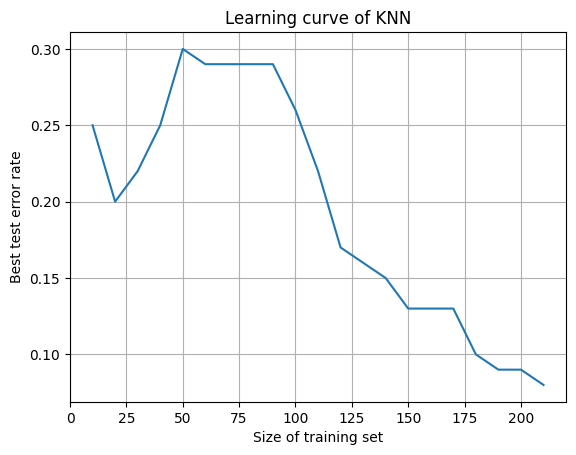

In [24]:
# Calculate the optimal k and corresponding test error rate for each training set size N

V_K_INCRE = 5 # set increment of k as 5
V_N_INCRE = 10 # set increment of size of training set (a.k.a N) as 10
V_N_START_VALUE = 10 # set start value of N as 10
V_N_END_VALUE = df_train.shape[0] + 1 # set end value of N as 210

n_test_error_rate_list = []
for N in range(V_N_START_VALUE, V_N_END_VALUE, V_N_INCRE):
    sample_train_data = sample_train_set(df_train, C_DUMMY_CLASS, N)
    optimal_k, optimal_test_error_rate = get_optimal_k(sample_train_data, C_DUMMY_CLASS, df_test, V_K_INCRE)
    n_test_error_rate_list.append([N, optimal_test_error_rate])

# Plot learning curve
n_test_error_rate_array = np.array(n_test_error_rate_list).T

plt.plot(n_test_error_rate_array[0], n_test_error_rate_array[1])
plt.title("Learning curve of KNN")
plt.xlabel("Size of training set")
plt.ylabel("Best test error rate")
plt.grid(True)
plt.show()

1. At the beginning of Learning Curve, there's **a decrease** in test error rate and **subsequent increase**. This is because as n increases, the model begins to fit to the training set. However, it **might not generalize well** to the test set, leading to an increase in test error.

2. Then, there are **3 plateaus** where best test error rate doesn't decrease even more data is added into training set. (e.g., when n increases from 60 to 90, the best test error rate keeps as 0.29)

3. There is a **significant decrease** in best test error rate when n increases **from 90 to 120**. Thus, it is necessary to set n > 90 at this case to get better prediction results.

4. When n > 150, the decrease of test error rate is less significant compared with previous stages (e.g., [90, 120]). Thus, it is necessary to trade off between training efficiency and error rate when n > 150.


### (d) Other Metrics

sklearn.neighbors.DistanceMetric is not used here because **it was removed from scikit-learn 1.3.0**.

**scipy.spatial.distance** and the metrics listed in **distance_metrics** can be used as valid metric values.

Ref:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [25]:
V_K_INCRE = 5 # set increment of k as 5

man_optimal_k, man_min_test_error_rate = get_optimal_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE, distance_metrics='manhattan')

print("Optimal k with Manhattan distance:", man_optimal_k)
print("Minimum test error rate with Manhattan distance:", man_min_test_error_rate)

Optimal k with Manhattan distance: 1
Minimum test error rate with Manhattan distance: 0.11


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [26]:
V_LOGP_START_VALUE = 0.1 # set start value of log10(p) as 0.1
V_LOGP_INCRE = 0.1 # set increment of log10(p) as 0.1
V_LOGP_END_VALUE = 1.1 # set end value of log10(p) as 1.0


p_error_rate = {}

for log_p in np.arange(V_LOGP_START_VALUE, V_LOGP_END_VALUE, V_LOGP_INCRE):
    log_p = round(log_p, 1)
    p = math.pow(10, log_p)
    pred_train_data, pred_test_data = knn_classifier(df_train, C_DUMMY_CLASS, df_test, man_optimal_k, distance_metric='minkowski', p=p)
    p_error_rate[log_p] = [_cal_error_rate(df_train[C_DUMMY_CLASS], pred_train_data),
                            _cal_error_rate(df_test[C_DUMMY_CLASS], pred_test_data)]

df_p_error_rate = pd.DataFrame(p_error_rate, index=[C_TRAIN_ERROR_RATE, C_TEST_ERROR_RATE]).T

mink_optimal_log_p = df_p_error_rate[C_TEST_ERROR_RATE].idxmin()
mink_min_test_error_rate = df_p_error_rate[C_TEST_ERROR_RATE].min()

print(f"Optimal log10(p) with Minkowski distance (when k = {man_optimal_k}):", mink_optimal_log_p)
print(f"Minimum test error rate with Minkowski distance (when k = {man_optimal_k}):", mink_min_test_error_rate)

Optimal log10(p) with Minkowski distance (when k = 1): 0.7
Minimum test error rate with Minkowski distance (when k = 1): 0.11


In [27]:
# Display the training error rate and test error rate with each p (set k=1)
print(df_p_error_rate.reset_index().rename(columns={'index': 'p'}))

     p  train_error_rate  test_error_rate
0  0.1               0.0             0.13
1  0.2               0.0             0.13
2  0.3               0.0             0.13
3  0.4               0.0             0.14
4  0.5               0.0             0.14
5  0.6               0.0             0.12
6  0.7               0.0             0.11
7  0.8               0.0             0.11
8  0.9               0.0             0.11
9  1.0               0.0             0.11


|   p |   train_error_rate |   test_error_rate |
|----:|-------------------:|------------------:|
| 0.1 |                  0 |              0.13 |
| 0.2 |                  0 |              0.13 |
| 0.3 |                  0 |              0.13 |
| 0.4 |                  0 |              0.14 |
| 0.5 |                  0 |              0.14 |
| 0.6 |                  0 |              0.12 |
| 0.7 |                  0 |              0.11 |
| 0.8 |                  0 |              0.11 |
| 0.9 |                  0 |              0.11 |
| 1   |                  0 |              0.11 |

The optimal $\log_{10}(p)=0.7$. When $\log_{10}(p)=0.7, p=10^{0.7}=5.01$

##### C. Chebyshev Distance With p -> infinity.

In [28]:
V_K_INCRE = 5 # set increment of k as 5

che_optimal_k, che_min_test_error_rate = get_optimal_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE, distance_metrics='chebyshev')

print("Optimal k with Chebyshev distance:", che_optimal_k)
print("Minimum test error rate with Chebyshev distance:", che_min_test_error_rate)

Optimal k with Chebyshev distance: 16
Minimum test error rate with Chebyshev distance: 0.08


#### ii. Mahalanobis Distance.

In [29]:
def _cal_inv_cov_matrix(X: pd.DataFrame | np.ndarray, condition_number_thrshold: int = 1e16) -> np.ndarray:
    """
    Calculate inverse of covariance matrix.
    If the covariance matrix is singular or ill-conditioned (condition number is very large), 
    use a pseudoinverse instead of inverse. 

    Args:
        X: matrix of origin data
        condition_number_threshold: if condition number of covariance matrix of X is larger than this threshold, ill-conditioned
    
    Returns: inv_cov_matrix
    """
    cov_matrix = np.cov(X, rowvar=False)

    # If cov_matrix is singular or ill-conditioned
    if (np.linalg.det(cov_matrix) == 0) | (np.linalg.cond(cov_matrix) > condition_number_thrshold):
        return np.linalg.pinv(cov_matrix)
    return np.linalg.inv(cov_matrix)

In [30]:
V_K_INCRE = 5 # set increment of k as 5

inv_cov_matrix = _cal_inv_cov_matrix(df_train.drop(columns=C_DUMMY_CLASS))
mah_optimal_k, mah_min_test_error_rate = get_optimal_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE,\
                                                        distance_metrics='mahalanobis', metric_parameter={"VI": inv_cov_matrix})

print("Optimal k with Mahalanobis distance:", mah_optimal_k)
print("Minimum test error rate with Mahalanobis distance:", mah_min_test_error_rate)

Optimal k with Mahalanobis distance: 1
Minimum test error rate with Mahalanobis distance: 0.15


In [42]:
get_error_rate_per_k(df_train, C_DUMMY_CLASS, df_test, 5, distance_metrics='mahalanobis', metric_parameter={"VI": inv_cov_matrix})

,train_error_rate,test_error_rate
1,0.00,0.15
6,0.14,0.16
11,0.16,0.18
16,0.15,0.17
21,0.16,0.20
26,0.16,0.17
31,0.17,0.21
36,0.17,0.21
41,0.19,0.19
46,0.19,0.22


### (e) Weighted Decision

In [31]:
C_DISTANCE_TYPE = "distance_type"
C_OPTIMA_K = "optimal_k"

# Euclidean
weighted_euc_optimal_k, weighted_euc_min_test_error_rate = get_optimal_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE, 'distance')

# Manhattan
weighted_man_optimal_k, weighted_man_min_test_error_rate = get_optimal_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE, 'distance',
                                                                          'manhattan', 1)

# Chebyshev
weighted_che_optimal_k, weighted_che_min_test_error_rate = get_optimal_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE, 'distance', 'chebyshev')

df_weighted_test_error_rate = pd.DataFrame({C_DISTANCE_TYPE: ['Euclidean', 'Manhattan', 'Chebyshev'],
                       C_OPTIMA_K: [weighted_euc_optimal_k, weighted_man_optimal_k, weighted_che_optimal_k],
                       C_TEST_ERROR_RATE: [weighted_euc_min_test_error_rate, weighted_man_min_test_error_rate, weighted_che_min_test_error_rate]})

In [32]:
# Display test error rate of various distance metrics with weighted voting
print(df_weighted_test_error_rate)

  distance_type  optimal_k  test_error_rate
0     Euclidean          6             0.10
1     Manhattan         26             0.10
2     Chebyshev         16             0.11


### (f) Training Error Rate

In [33]:
# Find the lowest training error rate for each case
C_P_METRIC = "p"
C_POLLING_METHOD = "polling_method"


df_uniform_train_error_rate = pd.DataFrame([['Euclidean', 2, 'majority polling', df_error_rate_k_incre_1[C_TRAIN_ERROR_RATE].min()],
 ['Manhattan', 1, 'majority polling', get_error_rate_per_k(df_train, C_DUMMY_CLASS, df_test,
                                                            V_K_INCRE, distance_metrics='manhattan')[C_TRAIN_ERROR_RATE].min()],
 ['Chebyshev', math.inf, 'majority polling', get_error_rate_per_k(df_train, C_DUMMY_CLASS, df_test, 
                                                                  V_K_INCRE, distance_metrics='chebyshev')[C_TRAIN_ERROR_RATE].min()],
 ['Mahalanobis', None, 'majority polling', get_error_rate_per_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE,\
                                    distance_metrics='mahalanobis', metric_parameter={"VI": inv_cov_matrix})[C_TRAIN_ERROR_RATE].min()]] + \
 [['Minkowski', round(math.pow(10, index), 2), 'majority polling', row[C_TRAIN_ERROR_RATE]] for index, row in df_p_error_rate.iterrows()],
 columns=[C_DISTANCE_TYPE, C_P_METRIC, C_POLLING_METHOD, C_TRAIN_ERROR_RATE])

In [34]:
df_weighted_train_error_rate = pd.DataFrame([['Euclidean', 2, 'distance weighted', 
                             get_error_rate_per_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE, 'distance')[C_TRAIN_ERROR_RATE].min()],
                             ['Manhattan', 1, 'distance weighted', 
                             get_error_rate_per_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE,\
                                                   'distance', 'manhattan')[C_TRAIN_ERROR_RATE].min()],
                             ['Chebyshev', math.inf, 'distance weighted', 
                             get_error_rate_per_k(df_train, C_DUMMY_CLASS, df_test, V_K_INCRE,\
                                                  'distance', 'chebyshev')[C_TRAIN_ERROR_RATE].min()]],
                             columns=[C_DISTANCE_TYPE, C_P_METRIC, C_POLLING_METHOD, C_TRAIN_ERROR_RATE])

In [35]:
df_all_train_error_rate = pd.concat([df_uniform_train_error_rate, df_weighted_train_error_rate])

print(df_all_train_error_rate)

   distance_type      p     polling_method  train_error_rate
0      Euclidean   2.00   majority polling               0.0
1      Manhattan   1.00   majority polling               0.0
2      Chebyshev    inf   majority polling               0.0
3    Mahalanobis    NaN   majority polling               0.0
4      Minkowski   1.26   majority polling               0.0
5      Minkowski   1.58   majority polling               0.0
6      Minkowski   2.00   majority polling               0.0
7      Minkowski   2.51   majority polling               0.0
8      Minkowski   3.16   majority polling               0.0
9      Minkowski   3.98   majority polling               0.0
10     Minkowski   5.01   majority polling               0.0
11     Minkowski   6.31   majority polling               0.0
12     Minkowski   7.94   majority polling               0.0
13     Minkowski  10.00   majority polling               0.0
0      Euclidean   2.00  distance weighted               0.0
1      Manhattan   1.00 

| distance_type   |      p | polling_method    |   train_error_rate |
|:----------------|-------:|:------------------|-------------------:|
| Euclidean       |   2    | majority polling  |                  0 |
| Manhattan       |   1    | majority polling  |                  0 |
| Chebyshev       | inf    | majority polling  |                  0 |
| Mahalanobis     | nan    | majority polling  |                  0 |
| Minkowski       |   1.26 | majority polling  |                  0 |
| Minkowski       |   1.58 | majority polling  |                  0 |
| Minkowski       |   2    | majority polling  |                  0 |
| Minkowski       |   2.51 | majority polling  |                  0 |
| Minkowski       |   3.16 | majority polling  |                  0 |
| Minkowski       |   3.98 | majority polling  |                  0 |
| Minkowski       |   5.01 | majority polling  |                  0 |
| Minkowski       |   6.31 | majority polling  |                  0 |
| Minkowski       |   7.94 | majority polling  |                  0 |
| Minkowski       |  10    | majority polling  |                  0 |
| Euclidean       |   2    | distance weighted |                  0 |
| Manhattan       |   1    | distance weighted |                  0 |
| Chebyshev       | inf    | distance weighted |                  0 |


Thus, the lowest training error rate I achieved is 0.

##### Test error results

In [36]:
df_uniform_test_error_rate = pd.DataFrame([['Euclidean', 2, 'majority polling', 4, 0.06],
                                      ['Manhattan', 1, 'majority polling', 1, 0.11],
                                      ['Chebyshev', math.inf, 'majority polling', 16, 0.08],
                                      ['Mahalanobis', None, 'majority polling', 1, 0.15]] + 
                                      [['Minkowski', round(math.pow(10, index), 2), 'majority polling', 1, row[C_TEST_ERROR_RATE]]\
                                        for index, row in df_p_error_rate.iterrows()],
                                        columns=[C_DISTANCE_TYPE, 'p', 'polling_method', C_OPTIMA_K, C_TEST_ERROR_RATE])

In [37]:
print(df_uniform_test_error_rate)

   distance_type      p    polling_method  optimal_k  test_error_rate
0      Euclidean   2.00  majority polling          4             0.06
1      Manhattan   1.00  majority polling          1             0.11
2      Chebyshev    inf  majority polling         16             0.08
3    Mahalanobis    NaN  majority polling          1             0.15
4      Minkowski   1.26  majority polling          1             0.13
5      Minkowski   1.58  majority polling          1             0.13
6      Minkowski   2.00  majority polling          1             0.13
7      Minkowski   2.51  majority polling          1             0.14
8      Minkowski   3.16  majority polling          1             0.14
9      Minkowski   3.98  majority polling          1             0.12
10     Minkowski   5.01  majority polling          1             0.11
11     Minkowski   6.31  majority polling          1             0.11
12     Minkowski   7.94  majority polling          1             0.11
13     Minkowski  10

In [38]:
df_weighted_test_error_rate[C_P_METRIC] = [2, 1, math.inf]
df_weighted_test_error_rate[C_POLLING_METHOD] = 'distance weighted'

df_all_test_error_rate = pd.concat([df_uniform_test_error_rate, df_weighted_test_error_rate])

In [39]:
print(df_all_test_error_rate)

   distance_type      p     polling_method  optimal_k  test_error_rate
0      Euclidean   2.00   majority polling          4             0.06
1      Manhattan   1.00   majority polling          1             0.11
2      Chebyshev    inf   majority polling         16             0.08
3    Mahalanobis    NaN   majority polling          1             0.15
4      Minkowski   1.26   majority polling          1             0.13
5      Minkowski   1.58   majority polling          1             0.13
6      Minkowski   2.00   majority polling          1             0.13
7      Minkowski   2.51   majority polling          1             0.14
8      Minkowski   3.16   majority polling          1             0.14
9      Minkowski   3.98   majority polling          1             0.12
10     Minkowski   5.01   majority polling          1             0.11
11     Minkowski   6.31   majority polling          1             0.11
12     Minkowski   7.94   majority polling          1             0.11
13    

 distance_type   |      p | polling_method    |   optimal_k |   test_error_rate |
|:----------------|-------:|:------------------|------------:|------------------:|
| Euclidean       |   2    | majority polling  |           4 |              0.06 |
| Manhattan       |   1    | majority polling  |           1 |              0.11 |
| Chebyshev       | inf    | majority polling  |          16 |              0.08 |
| Mahalanobis     | nan    | majority polling  |           1 |              0.15 |
| Minkowski       |   1.26 | majority polling  |           1 |              0.13 |
| Minkowski       |   1.58 | majority polling  |           1 |              0.13 |
| Minkowski       |   2    | majority polling  |           1 |              0.13 |
| Minkowski       |   2.51 | majority polling  |           1 |              0.14 |
| Minkowski       |   3.16 | majority polling  |           1 |              0.14 |
| Minkowski       |   3.98 | majority polling  |           1 |              0.12 |
| Minkowski       |   5.01 | majority polling  |           1 |              0.11 |
| Minkowski       |   6.31 | majority polling  |           1 |              0.11 |
| Minkowski       |   7.94 | majority polling  |           1 |              0.11 |
| Minkowski       |  10    | majority polling  |           1 |              0.11 |
| Euclidean       |   2    | distance weighted |           6 |              0.1  |
| Manhattan       |   1    | distance weighted |          26 |              0.1  |
| Chebyshev       | inf    | distance weighted |          16 |              0.11 |

Shown as above table, the lowest test error rate I achieved in this homework is 0. The lowest test error rate I achieved is 0.06. 